In [34]:
from skimage.io import imread_collection
from sklearn.manifold import TSNE
import plotly.express as px
from skimage import io
import pandas as pd
import numpy as np
import os

## Read all images in

In [35]:
filelist = []
labellist = []
for root, dirs, files in os.walk("data\\images\\train", topdown=False):
    for folder in dirs:
        folderpath = os.path.join(root, folder, '*.jpg')
        print(folderpath)
        images = imread_collection(folderpath)
        for i in images:
            filelist.append(i.ravel())
            labellist.append(folder)

data\images\train\0\*.jpg
data\images\train\1\*.jpg
data\images\train\2\*.jpg
data\images\train\3\*.jpg
data\images\train\4\*.jpg
data\images\train\5\*.jpg
data\images\train\6\*.jpg
data\images\train\7\*.jpg
data\images\train\8\*.jpg
data\images\train\9\*.jpg


In [36]:
dict_img = {'image' : filelist, 'label':labellist}

In [37]:
df_img = pd.DataFrame(data = dict_img)

In [39]:
sample_idx = 35596
sample_image = df_img['image'][sample_idx].reshape(28,28)
sample_label = df_img['label'][sample_idx]

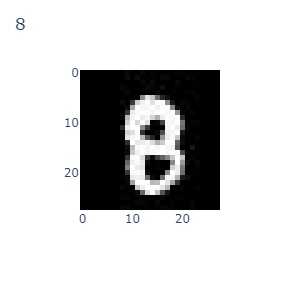

In [40]:
fig = px.imshow(sample_image, color_continuous_scale='gray')
fig.update_layout(title = sample_label, coloraxis_showscale=False)
fig.show(renderer = "png", width = 300, height = 300)

In [41]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_img['image'].values.tolist())

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 42000 samples in 13.430s...
[t-SNE] Computed neighbors for 42000 samples in 2194.046s...
[t-SNE] Computed conditional probabilities for sample 1000 / 42000
[t-SNE] Computed conditional probabilities for sample 2000 / 42000
[t-SNE] Computed conditional probabilities for sample 3000 / 42000
[t-SNE] Computed conditional probabilities for sample 4000 / 42000
[t-SNE] Computed conditional probabilities for sample 5000 / 42000
[t-SNE] Computed conditional probabilities for sample 6000 / 42000
[t-SNE] Computed conditional probabilities for sample 7000 / 42000
[t-SNE] Computed conditional probabilities for sample 8000 / 42000
[t-SNE] Computed conditional probabilities for sample 9000 / 42000
[t-SNE] Computed conditional probabilities for sample 10000 / 42000
[t-SNE] Computed conditional probabilities for sample 11000 / 42000
[t-SNE] Computed conditional probabilities for sample 12000 / 42000
[t-SNE] Computed conditional probabilities fo

In [51]:
#pd.DataFrame(tsne_results).to_csv('tsne.csv', index=False)

In [42]:
x_values = tsne_results[:,0]
y_values = tsne_results[:,1]

In [43]:
df_img['index'] = df_img.index.values

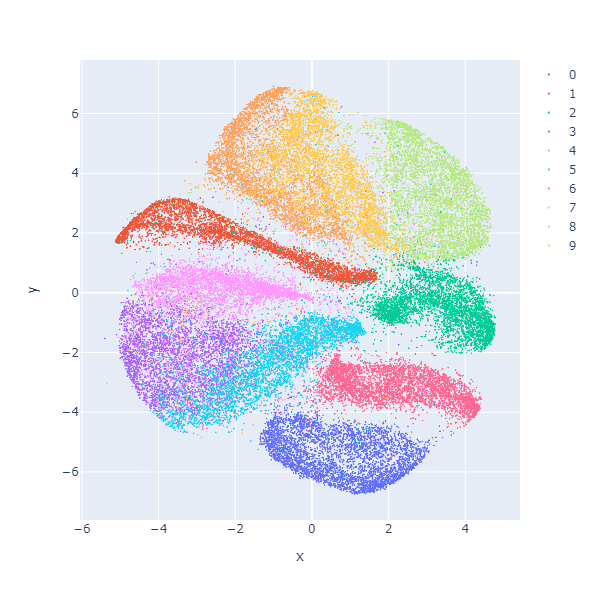

In [125]:
import plotly.express as px
fig = px.scatter(df_img, x=x_values, y=y_values, color=df_img['label'].values,
                 hover_data=['index'], render_mode='webgl',
                 width=900, height=1000)\
                .for_each_trace(lambda t: t.update(name=t.name.replace("color=","")))

fig.update_traces(marker_line=dict(width=0, color='DarkSlateGray'))
fig.update_traces(marker=dict(size=1.5))
fig.show(renderer = "png", height = 600, width = 600)